# Analysing text message data - Off Platform Project using Open Ended Guidance from Codecademy

## Step 1. Import and look over your dataset
Open your file and export its contents.

Take a look at the file. Take note of how the information is organised.

How will this affect the way you analyse the data in Python? Is there anything of particular interest to you in the dataset that you want to investigate? Think about these things before you start preprocessing.

> Not a dataset per se but a .txt file. Can be read in like a data frame using Pandas but many langage processing libraries require string input. 

## Step 2: Plan your analysis
Now that your data is imported, you can plan what you would like to analyze for your Portfolio Project. What insights would you like to learn and share from this data?

> What I am interested in is how well sentiment analysis might work on the data since the chat that I will be analysing is someone who I have very casual conversations with as well as very deep ones. Can Python libraries detect this or perhaps even help explain? 

>> Plus, I would be interested in knowing whether a change in sentiment and topics being breached over time is detectable as our friendship took on different meanings over time. 

Note to self. 'media' 'omitted' are placeholder values for media files sent in WhatsApp. 

## Step 3: Load libraries & create instances

In [8]:
# import required libraries/install them first in your terminal using pip, 
# eg pip install pandas. if you are getting errors, such as
# AttributeError: module 'inspect' has no attribute 'formatargspec', 
# try upgrading your libraries eg using
# pip install --upgrade pandas matplotlib nltk spacy textblob gensim transformers tqdm
# if this fails, try downgrading your Python environment or create a virtual environment
# with a downgraded version of Python installed

# general purpose/uncategorised libraries
from urllib import request # to open urls  
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import os
from collections import Counter
from matplotlib import transforms
from transformers import pipeline
from textblob import TextBlob
import spacy

# nltk libraries 
import nltk
from nltk import pos_tag, RegexpParser # to help mark up words for what part of speech they are in context 
from nltk.corpus import stopwords, wordnet # to get rid of filler words
from nltk.stem import WordNetLemmatizer # to reduce words to their root forms 
from nltk.tokenize import word_tokenize # to divide text into little bits 
from nltk.tree import Tree
from nltk.sentiment import SentimentIntensityAnalyzer

# gensim libraries for natural language models 
import gensim
from gensim import corpora, models, similarities, downloader
from collections import defaultdict
from gensim.models import Word2Vec
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models

# scikit learn libraries (machine learning)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_multilabel_classification

# required instances
lemmatiser = WordNetLemmatizer()
stopwords = set(stopwords.words('english')) # use another language if needed 
vectoriser = CountVectorizer()

## Step 4: Read in raw data.

To download the WhatsApp conversation you would like to analyse, go to the conversation in question on your phone and select Export Chat. 
Save the .txt file to your machine, unzip the file and read it in as a local file. 
You can read it as both a text file and a dataframe but for common preprocessing libraries to work, the data needs to be a string or bytes like object: 

In [9]:
base_path = r"C:\Users\laura\OneDrive\Desktop\projects\analyse_your_own_whatsapp"
filename = "_chat.txt"
path_to_file = os.path.join(base_path, filename)

In [10]:
# create string object from .txt file, use encoding: 
with open(path_to_file, 'r', encoding='utf-8') as file:
    text_data = file.read()

In [11]:
print(type(text_data))

<class 'str'>


## Step 5: Start preprocessing 
Conduct text preprocessing
Make sure to clean your data and prepare it for analysis.

Recall that the goal of text preprocessing is to reduce the data and distill it for the parts that will give you valuable insights. Some techniques we recommend for this dataset include:

Tokenization


Noise removal

Punctuation
Digits
Symbols
Stopwords
HTML tags
URLs
Text normalization

Stemming
Lemmatization
Lower casing

In [12]:
# normalise data so all letters are lower case
normalised = text_data.lower()

### Step 5.1: Remove everything I don't want

In [13]:
words_to_remove = ['laura', 'nikulski', 'jun', 'image', 'omitted', '‎', 'video', 'hey', 'im','i\'m', 'something', 'thing', 'whatsapp']
pattern = r'\b(' + '|'.join(map(re.escape, words_to_remove)) + r')\b|\d+'
cleaned_text = re.sub(pattern, '', normalised)
notneeded = re.sub(r'\s+', ' ', cleaned_text).strip()

Explanation: 
- \b: Word boundary to ensure matching whole words only from the list of the words that are not needed.
(' + '|'.join(map(re.escape, words_to_remove)) + '): Join the words with a pipe (|) which acts as an OR operator in regex. map(re.escape, words_to_remove) ensures that any special characters in the words are escaped.
- \d+: Matches one or more numbers. 
- r'\b(' + '|'.join(map(re.escape, words_to_remove)) + r')\b|\d+' matches any of the specified words or any sequence of digits.
- re.sub(pattern, '', text) replaces all specified words and numbers with an empty string.
- re.sub(r'\s+', ' ', cleaned_text).strip() strips the extra spaces

### Step 5.2 Keep everything I do want

In [14]:
# remove any characters that are not words except emojis
words_emojis = re.sub(r'[^\w\s\.\!\?\U0001F300-\U0001F64F\U0001F680-\U0001F6FF\u2600-\u26FF\u2700-\u27BF]', '', str(notneeded))


Explanation:
- re.sub means 'replace all characters that do not match the pattern in the brackets'
- r means a raw string literal is about to follow next 
- [^] means not
- \w means a word character, a b c etc
- \s means a white space character, like a space, a tab, or a newline
- all the bits after refer to emojis like so 
<br>
😎 \U0001F300-\U0001F64F matches emojis for emoticons. 
<br>
🚀 \U0001F680-\U0001F6FF matches emojis in the range of transport and map symbols.
<br>
🌸 \u2600-\u26FF matches emojis in the range of miscellaneous symbols.
<br>
✳ \u2700-\u27BF matches emojis in the range of dingbats.
<br>
- so all in all, I am saying that I want to remove all characters, except letters, spaces, and emojis from my normalised text. 


In [16]:
# tokenisation means to turn the string into individual string entities, separated by commas
tokenised = word_tokenize(words_emojis)

In [19]:
# removing stop words means to remove words like 'this', 'the' that do not 
# actively contribute to the meaning of the text 
nostopwords = [word for word in tokenised if word not in stopwords] 

In [20]:
# stemming reduces words to their base form, which makes text classification easier
# lemmatisation converts the word to its meaningful base form, which is called Lemma. 
# personally, I find that stemming is too blunt of a tool for my purposes and removes 
# too much meaning 
lemmatised = [lemmatiser.lemmatize(token) for token in nostopwords]

#### Interlude: Difference between Stemming and Lemmatisation
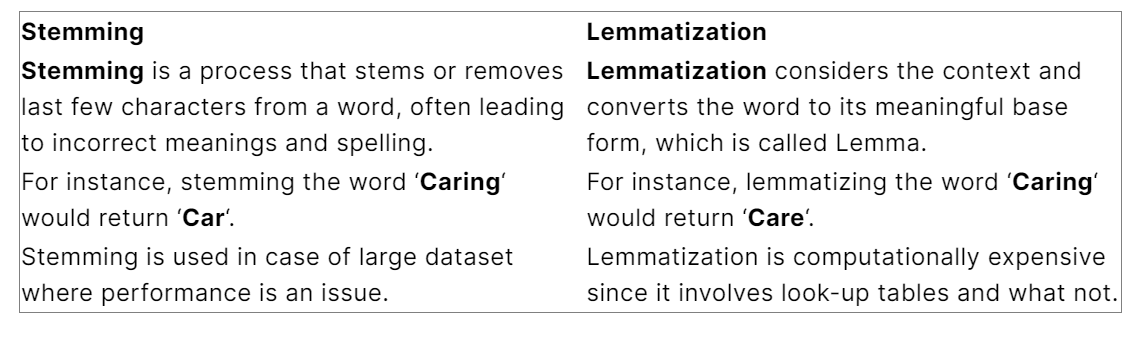
Source: [AnalyticsVidhya.com](https://www.analyticsvidhya.com/blog/2022/06/stemming-vs-lemmatization-in-nlp-must-know-differences/#:~:text=If%20speed%20is%20important%2C%20use,the%20application%20we%20are%20working)

In [22]:
# POS tagging refers to tagging words by their function (eg noun, adjective, etc)
# to check results of preprocessing. POS tagging used for demo purposes only but will
# not be used in this meetup
pos_tagged_text = []
pos_tagged_text.append(pos_tag(lemmatised))

### Step 6. Conduct your analysis

Having planned which analyses you wish to conduct on your data, you will now use the NLP skills gained throughout the course (and elsewhere) to analyze the data to gain the insight of your choosing.

Now that you have made preparation for your analysis, it is time to conduct it!

Remember that there can be multiple paths to achieving a goal and while you have done planning, if you run into an obstacle, or discover a more effective method it is important to be able to make adjustments along the way.

Some libraries to keep in mind:

spaCy
NLTK
pandas
re
TensorFlow
scikit-learn
Gensim
TextBlob

In [24]:
# I was curious to see the emojis used in our chat: 
emoji_pattern = re.compile(
    r'[\U0001F300-\U0001F64F'
    r'\U0001F680-\U0001F6FF'
    r'\u2600-\u26FF'
    r'\u2700-\u27BF]', 
    flags=re.UNICODE
)

# get only emojis from lemmatised
emojis = [word for word in lemmatised if emoji_pattern.match(word)]

# Count the frequency of each emoji
emoji_counts = Counter(emojis)

C:\Users\laura\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\laura\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\laura\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\laura\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128420 (\N{BLACK HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\laura\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128

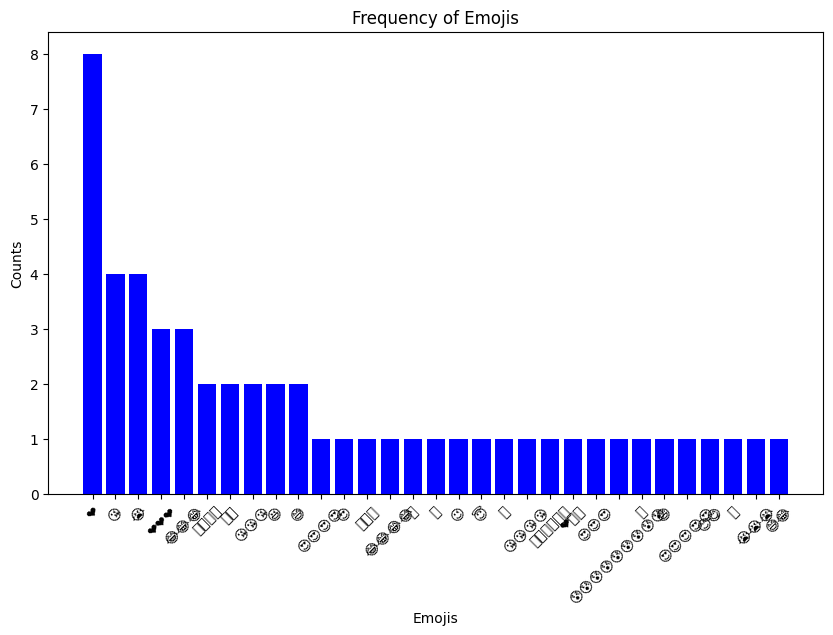

In [25]:
sorted_emoji_counts = emoji_counts.most_common()

# Get the emojis and their counts
emoji_labels, counts = zip(*sorted_emoji_counts)

# emojis did not display. Asked ChatGPT and it suggested this but still did not work
plt.rcParams['font.family'] = 'DejaVu Sans'

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(emoji_labels, counts, color='blue')
plt.xlabel('Emojis')
plt.ylabel('Counts')
plt.title('Frequency of Emojis')
plt.xticks(rotation=45)
plt.show()

In [26]:
# an attempt to get a general idea of what is talked about, turns out to be more generic and broader than I expected
def get_top_counts(string_list):
    string_counts = Counter(string_list)
    top_10_counts = dict(sorted(string_counts.items(), key=lambda x: x[1], reverse=True)[:20])
    return top_10_counts
get_top_counts(lemmatised)

{'!': 206,
 '.': 159,
 '?': 67,
 'know': 20,
 'like': 19,
 'im': 18,
 'year': 18,
 'time': 17,
 'one': 16,
 'well': 13,
 'joe': 13,
 'got': 12,
 'miss': 11,
 'going': 11,
 'look': 11,
 'really': 11,
 'day': 11,
 'good': 11,
 'better': 11,
 'friend': 11}

> After looking at the most common words, which did not tell me much, I decided to go into sentiment analysis and topic modelling, to get a better feel for what my friend and I had been discussing. 

#### 6.2 Sentiment Analysis

In [27]:
# starting out more general, positive vs negative sentiments
classifier = pipeline("sentiment-analysis")
positive_or_negative = classifier(lemmatised)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
c:\Users\laura\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [28]:
def positive_or_negative_counter(positive_or_negative):
    count = {'POSITIVE': 0, 'NEGATIVE': 0}
    for item in positive_or_negative:
        label = item['label']
        count[label] += 1
    return count
print(positive_or_negative_counter(positive_or_negative))

{'POSITIVE': 1878, 'NEGATIVE': 505}


In [29]:
# using spacy and text blob: 
def analyse_sentiment(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(normalised)
    sentences = [sent.text for sent in doc.sents]
    sentiment_counts = {'negative': 0, 'positive': 0, 'neutral': 0}

    for sentence in sentences:
        blob = TextBlob(sentence)
        sentiment_polarity = blob.sentiment.polarity
        if sentiment_polarity < 0:
            sentiment_counts['negative'] += 1
        elif sentiment_polarity > 0:
            sentiment_counts['positive'] += 1
        else:
            sentiment_counts['neutral'] += 1

    return sentiment_counts

In [30]:
sentiment_counts = analyse_sentiment(normalised)

c:\Users\laura\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.5.0) was trained with spaCy v3.5.0 and may not be 100% compatible with the current version (3.7.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [31]:
def visualise_sentiment(sentiment_counts):
    labels = sentiment_counts.keys()
    values = sentiment_counts.values()

    fig, ax = plt.subplots()
    ax.bar(labels, values)
    ax.set_ylabel('Count')
    ax.set_title('Sentiment Analysis')

    plt.show()

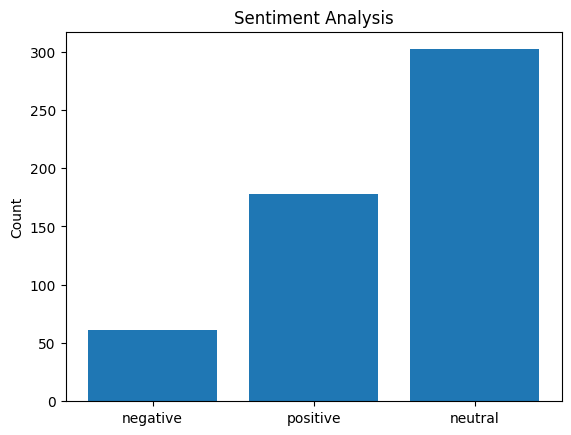

In [32]:
# this is per sentence, as opposed to per word 
visualise_sentiment(sentiment_counts)

In [33]:
nuanced_classifier = pipeline("text-classification", model='bhadresh-savani/distilbert-base-uncased-emotion', top_k=None)
sentiments = nuanced_classifier(lemmatised)
def count_highest_emotions(sentiments):
    emotion_counts = {}
    for sublist in sentiments:
        highest_emotion = None
        highest_score = 0
        for emotion_dict in sublist:
            emotion_label = emotion_dict['label']
            emotion_score = emotion_dict['score']
            if emotion_score > highest_score:
                highest_score = emotion_score
                highest_emotion = emotion_label
        if highest_emotion:
            if highest_emotion not in emotion_counts:
                emotion_counts[highest_emotion] = 1
            else:
                emotion_counts[highest_emotion] += 1
    return emotion_counts
counted_highest_emotions = count_highest_emotions(sentiments)

c:\Users\laura\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\laura\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


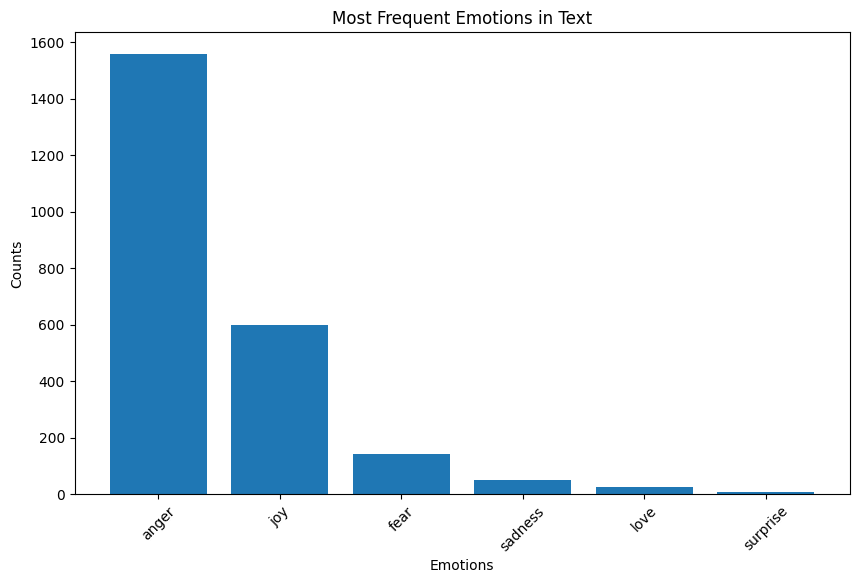

In [34]:
# Sort the counts by value
sorted_emotions = sorted(counted_highest_emotions.items(), key=lambda item: item[1], reverse=True)
emotions, counts = zip(*sorted_emotions)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(emotions, counts)
plt.xlabel('Emotions')
plt.ylabel('Counts')
plt.title('Most Frequent Emotions in Text')
plt.xticks(rotation=45)
plt.show()

> Sentiment analysis revealed that the highest ranked emotions in terms of count were joy and anger, while a more general analysis pointed towards positive emotions most of the time. This makes sense when considering that my friend and I love discussing the latest metal bands/metal tracks, many of whose band names and lyrics can be interpreted as angry.Topic analysis might help: 

I read around and it appears as though a popular library for topic modelling is LDA 
[sklearn.decomposition.LatentDirichletAllocation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html), so I followed the sci kit documentation. 

As it turns out, LDA requires a list of lists (an array) in order to work, so I decided to split the sentences by their punctuation mark as it currently is just a simple list: 



In [35]:
joined = ' '.join(lemmatised)

# split using punctuation marks but also keep them, they could be of interest
split_sentences = re.split(r'(?<=[.!?])\s+', joined)

# Convert each sentence back to a list of words
list_of_lists = [sentence.split() for sentence in split_sentences]

In [36]:
# Create a dictionary of the sentences 
dictionary = corpora.Dictionary(list_of_lists)

In [37]:
# Filter out extreme values in the dictionary (optional).
dictionary.filter_extremes(no_below=5, no_above=0.5)

In [38]:
# Create a Bag-of-Words representation of sentences
corpus = [dictionary.doc2bow(text) for text in list_of_lists]

In [39]:
# Set training parameters.
num_topics = 5  # You can change this number based on how many topics you would like to explore
passes = 20  # Number of passes over the corpus during training

In [40]:
# Train the LDA model.
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes, random_state=42)

In [41]:
topics = lda_model.print_topics(num_words=10)
for idx, topic in topics:
    print(f"Topic #{idx}:")
    print(topic)

Topic #0:
0.292*"?" + 0.057*"joe" + 0.036*"see" + 0.031*"one" + 0.030*"good" + 0.028*"better" + 0.027*"korean" + 0.027*"drinking" + 0.027*"looking" + 0.025*"though"
Topic #1:
0.113*"." + 0.092*"like" + 0.057*"got" + 0.057*"going" + 0.055*"look" + 0.037*"one" + 0.032*"beer" + 0.032*"say" + 0.030*"even" + 0.027*"!"
Topic #2:
0.360*"." + 0.039*"im" + 0.030*"time" + 0.030*"youre" + 0.027*"know" + 0.024*"get" + 0.023*"korea" + 0.022*"actually" + 0.020*"talk" + 0.020*"much"
Topic #3:
0.147*"." + 0.063*"love" + 0.061*"year" + 0.057*"..." + 0.057*"would" + 0.050*"kid" + 0.043*"baby" + 0.043*"last" + 0.036*"month" + 0.035*"thats"
Topic #4:
0.621*"!" + 0.028*"great" + 0.027*"really" + 0.027*"miss" + 0.022*"haha" + 0.019*"thanks" + 0.019*"well" + 0.019*"life" + 0.016*"know" + 0.016*"time"


In [42]:
# Prepare the visualization
pyLDAvis.enable_notebook()
vis_data = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary, sort_topics=True)

# Use local files
pyLDAvis.save_html(vis_data, 'lda_vis.html')

# Open the HTML file in your default browser
import webbrowser
webbrowser.open('lda_vis.html')

c:\Users\laura\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_sputils.py:44: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  upcast = np.find_common_type(args, [])


True